<a href="https://colab.research.google.com/github/corin2junseo/AiProject/blob/main/%EA%B8%B0%EB%A7%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                         # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/content/경찰청_범죄자 직업_12_31_2020.csv'
dforiginal = pd.read_csv(filename, encoding='cp949')

dforiginal.head()

,범죄대분류,범죄중분류,자영업(소계),자영업(농.임.수산업),자영업(광업),자영업(제조업),자영업(건설업),자영업(도.소매업),자영업(무역업),자영업(요식업),...,전문직(기타전문직),공무원,기타(소계),기타(학생),기타(주부),기타(전경.의경),기타(공익요원),기타(기타),무직자,미상
0,강력범죄,살인기수,34,4,0,0,4,0,0,1,...,2,4,39,5,10,0,0,24,155,28
1,강력범죄,살인미수등,50,6,0,0,7,0,1,4,...,3,4,61,14,9,0,1,37,184,47
2,강력범죄,강도,87,2,0,0,8,0,1,0,...,3,1,355,239,6,0,0,110,509,66
3,강력범죄,강간,761,77,0,7,57,7,1,32,...,115,44,1543,699,4,2,9,829,1296,638
4,강력범죄,유사강간,115,11,0,2,7,1,0,6,...,21,3,269,135,1,2,3,128,204,94


In [3]:
filename = '/content/경찰청_범죄자 직업_12_31_2020.csv'
dforiginal = pd.read_csv(filename, encoding='cp949')
df = dforiginal.drop(['범죄대분류'],axis=1)
df = df.groupby('범죄중분류').sum()

df.head()

,자영업(소계),자영업(농.임.수산업),자영업(광업),자영업(제조업),자영업(건설업),자영업(도.소매업),자영업(무역업),자영업(요식업),자영업(숙박업),자영업(유흥업),...,전문직(기타전문직),공무원,기타(소계),기타(학생),기타(주부),기타(전경.의경),기타(공익요원),기타(기타),무직자,미상
범죄중분류,,,,,,,,,,,,,,,,,,,,,
강간,761,77,0,7,57,7,1,32,17,19,...,115,44,1543,699,4,2,9,829,1296,638
강도,87,2,0,0,8,0,1,0,2,7,...,3,1,355,239,6,0,0,110,509,66
강제추행,2246,198,0,42,160,15,11,102,21,45,...,436,263,3590,1294,25,2,13,2256,3321,1513
공갈,398,30,0,12,43,1,3,16,2,7,...,38,7,1105,735,30,0,0,340,913,428
기타 강간 강제추행등,39,10,0,0,6,0,0,2,2,1,...,1,0,119,68,2,0,1,48,90,18


158124.0
239445.5
25037.5
43688.5
187727.0
654022.5



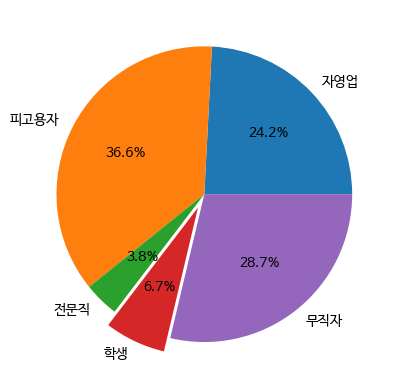

In [4]:
#나누기 2를 해서 소계만 구함
self_employment = (df['자영업(소계)'].sum().sum())/2
employee = df['피고용자(소계)'].sum().sum()/2
professional = df['전문직(소계)'].sum().sum()/2
student = df['기타(학생)'].sum().sum()/2
unemployed = df['무직자'].sum().sum()/2

all_sum = self_employment+employee+professional+student+unemployed

print(self_employment)
print(employee)
print(professional)
#print(public_official)
print(student)
print(unemployed)
print(all_sum)
print()
ratio = [158124.0,239445.5,25037.5,43688.5,187727.0]
labels=['자영업','피고용자','전문직','학생','무직자']
explode = [0,0,0, 0.1,0.0]

plt.pie(ratio, labels=labels, explode=explode,autopct='%.1f%%', textprops={'fontsize': 10})
plt.show()

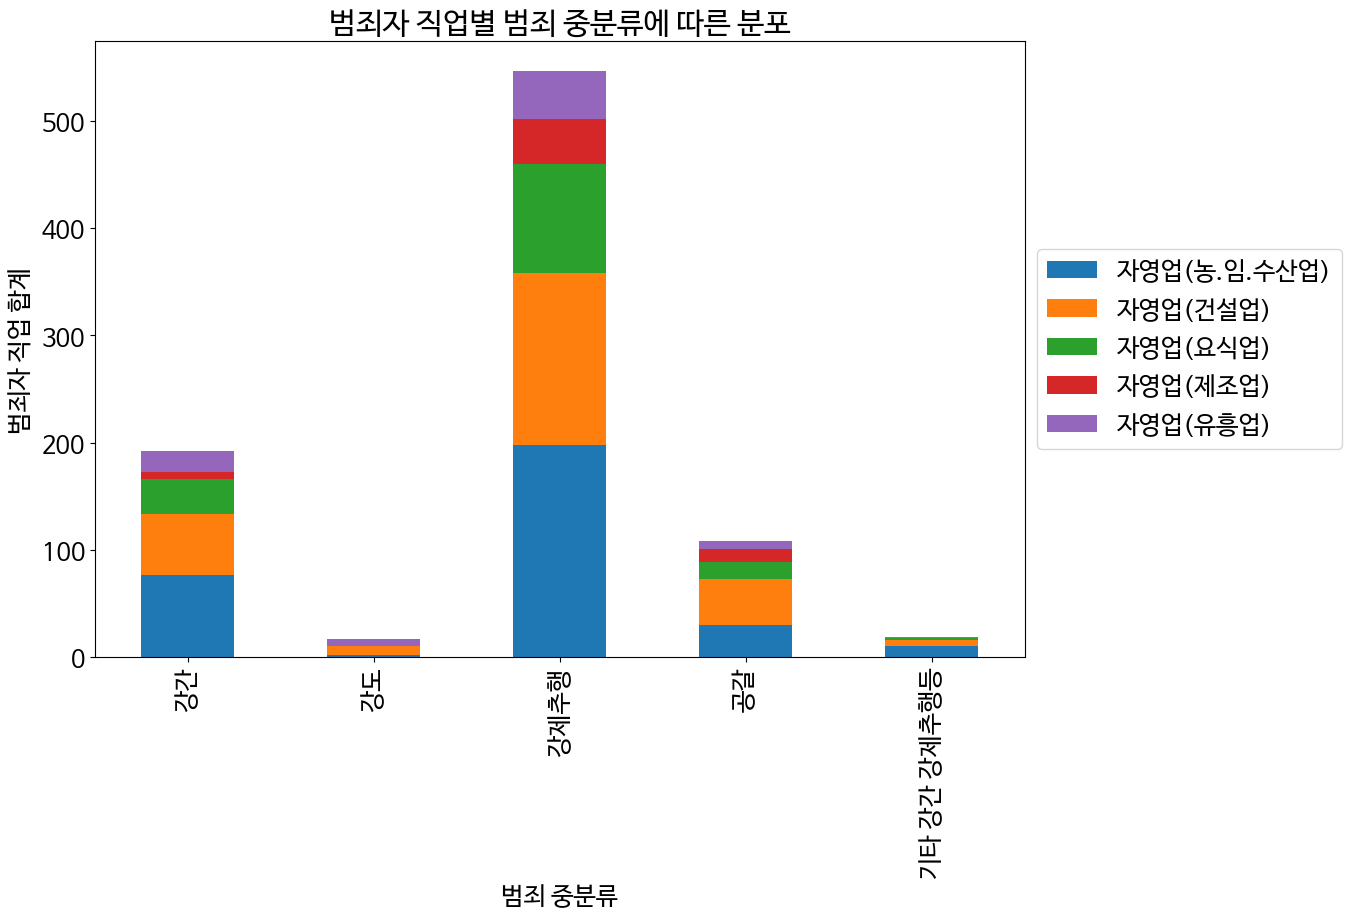

In [6]:
# '자영업'에 해당하는 칼럼들만 선택하여 각 칼럼의 합 계산
self_employment_columns = ['자영업(소계)', '자영업(농.임.수산업)', '자영업(광업)', '자영업(제조업)', '자영업(건설업)',
                           '자영업(도.소매업)', '자영업(무역업)', '자영업(요식업)', '자영업(숙박업)', '자영업(유흥업)']

# '자영업'에 해당하는 칼럼들 중 상위 5개 직업 열 선택
top_5_self_employment = df[self_employment_columns].sum().nlargest(6).index[1:].tolist()

# 상위 5개 직업 열을 이용하여 그래프 그리기
df.loc['강간':'기타 강간 강제추행등', top_5_self_employment].plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('범죄자 직업별 범죄 중분류에 따른 분포')
plt.xlabel('범죄 중분류')
plt.ylabel('범죄자 직업 합계')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

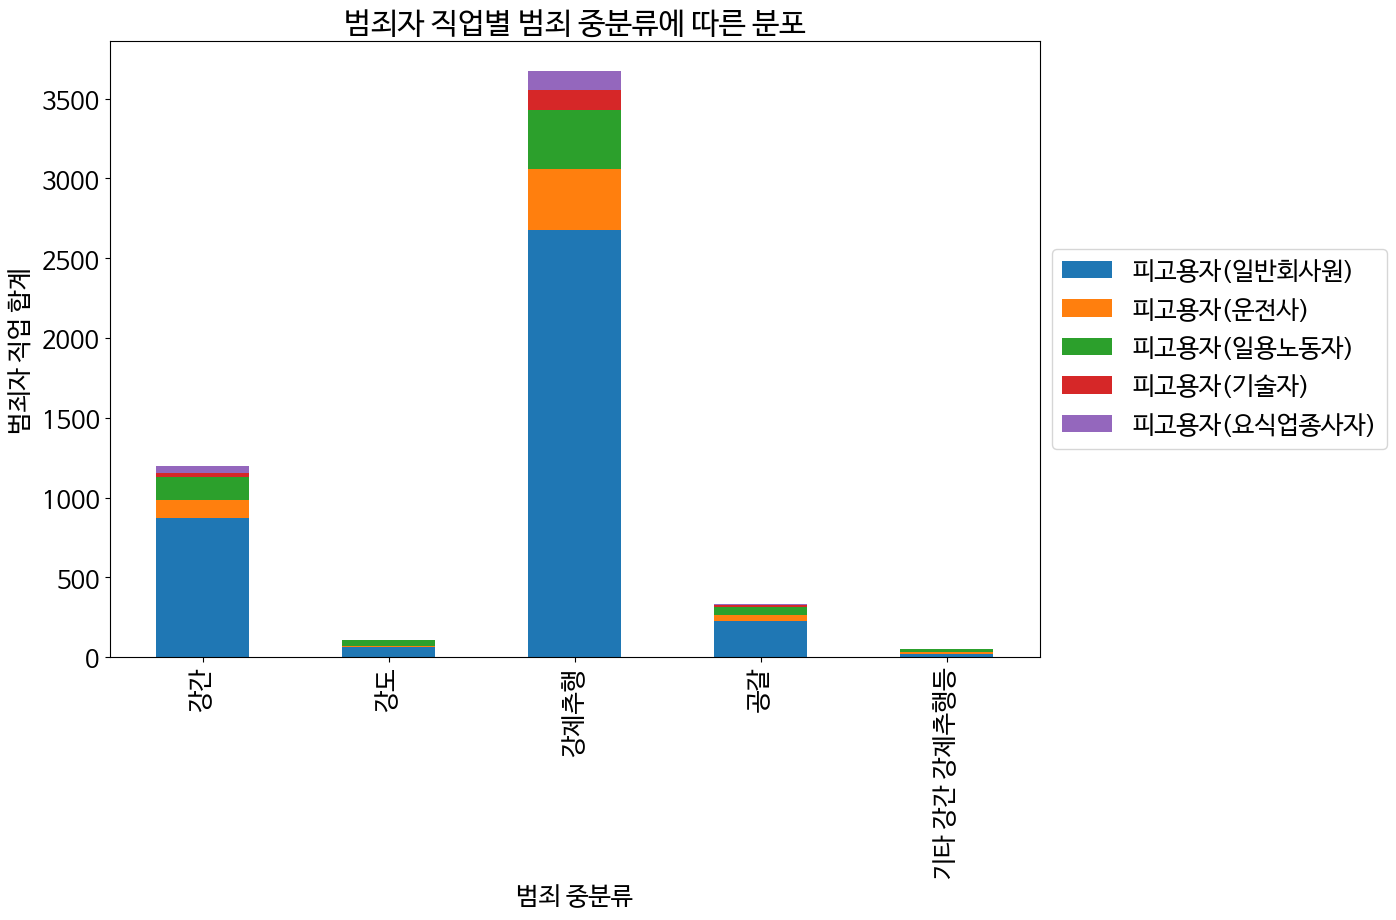

In [7]:
# '피고용자'에 해당하는 칼럼들만 선택하여 각 칼럼의 합 계산
employee_columns = ['피고용자(교원(사립))', '피고용자(사무원)', '피고용자(기술자)', '피고용자(점원)',
                    '피고용자(공원)', '피고용자(운전사)', '피고용자(경비원)', '피고용자(외판원)', '피고용자(국공영기업체직원)',
                    '피고용자(일반회사원)', '피고용자(금융기관직원)', '피고용자(유흥업종사자)', '피고용자(요식업종사자)', '피고용자(일용노동자)']

# '피고용자'에 해당하는 칼럼들 중 상위 5개 직업 열 선택
top_5_employee = df[employee_columns].sum().nlargest(5).index.tolist()

# 상위 5개 직업 열을 이용하여 그래프 그리기
df.loc['강간':'기타 강간 강제추행등', top_5_employee].plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('범죄자 직업별 범죄 중분류에 따른 분포')
plt.xlabel('범죄 중분류')
plt.ylabel('범죄자 직업 합계')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

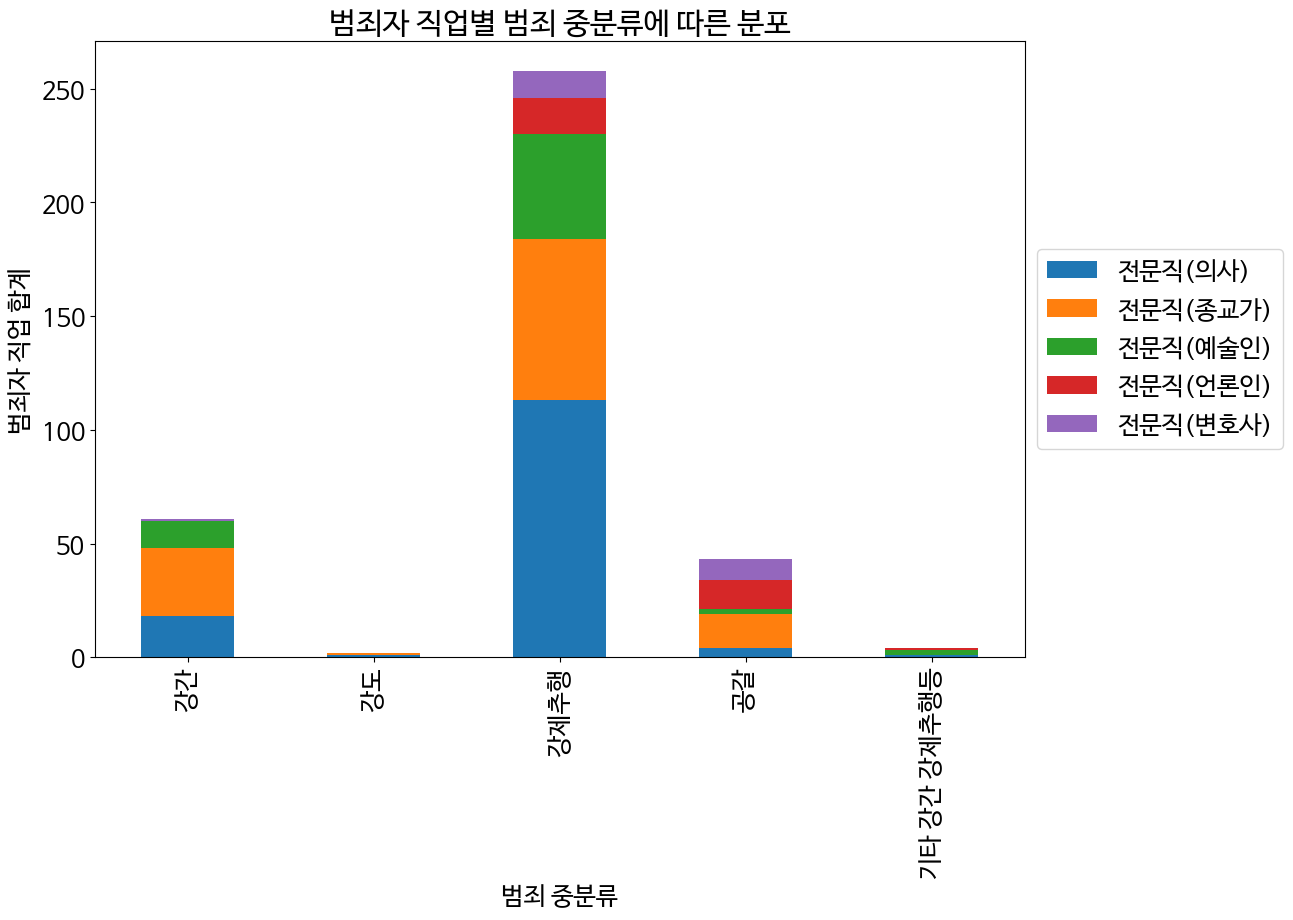

In [8]:
# '전문직'에 해당하는 칼럼들만 선택하여 각 칼럼의 합 계산
professional_columns = ['전문직(의사)', '전문직(변호사)', '전문직(교수)', '전문직(종교가)', '전문직(언론인)', '전문직(예술인)']

# '전문직'에 해당하는 칼럼들 중 상위 5개 직업 열 선택
top_5_professional = df[professional_columns].sum().nlargest(5).index.tolist()

# 상위 5개 직업 열을 이용하여 그래프 그리기
df.loc['강간':'기타 강간 강제추행등', top_5_professional].plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('범죄자 직업별 범죄 중분류에 따른 분포')
plt.xlabel('범죄 중분류')
plt.ylabel('범죄자 직업 합계')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

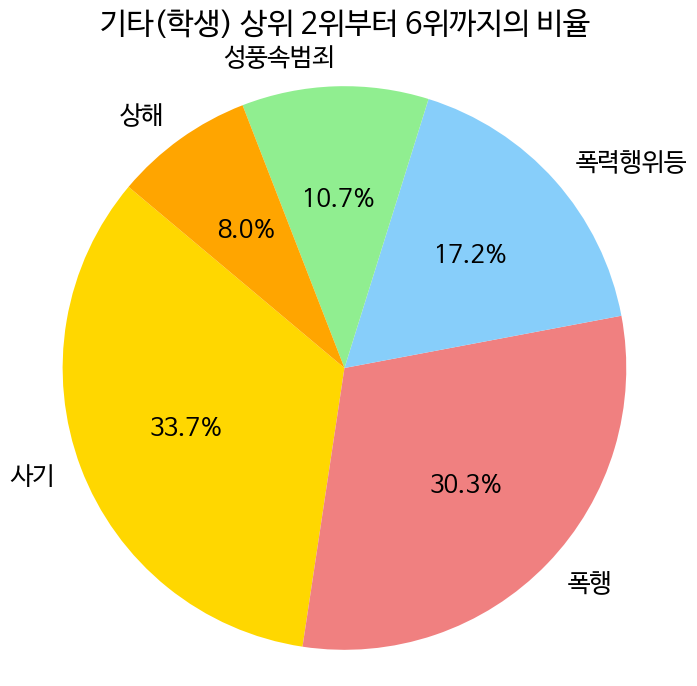

In [9]:
# '기타(학생)' 열의 상위 2위부터 6위까지 데이터 가져오기
top_2_to_6_students = df['기타(학생)'].nlargest(6).iloc[1:]

# 색상
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange']

# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(top_2_to_6_students, labels=top_2_to_6_students.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 원을 원형으로 보이기 위해
plt.title('기타(학생) 상위 2위부터 6위까지의 비율',pad=20)
plt.show()

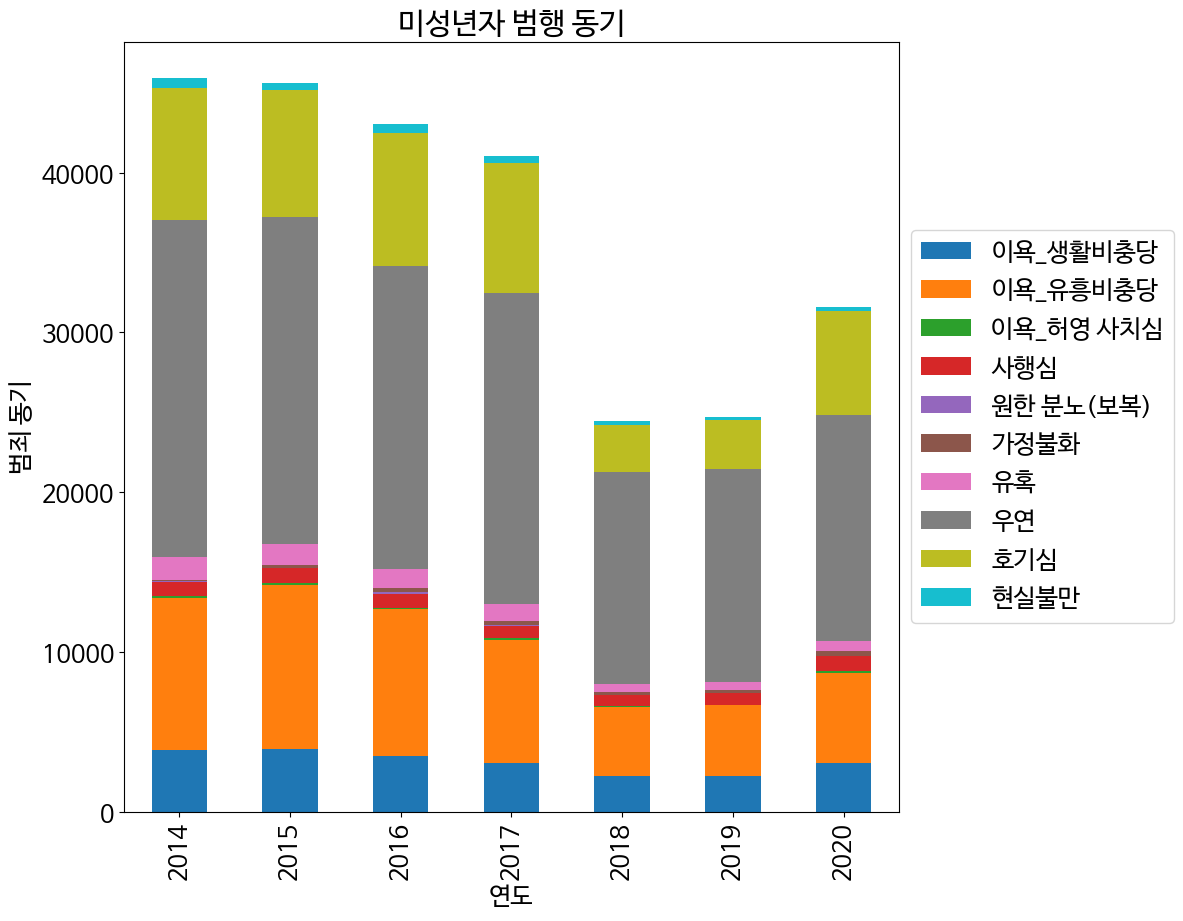

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/content/경찰청_미성년자 범행 동기 현황_20201231.csv'
dforiginal2 = pd.read_csv(filename, encoding='cp949')
df2 = dforiginal2.drop(['기타','총합'], axis=1)

# '연도' 열을 인덱스로 설정하여 플로팅
df2.set_index('연도', inplace=True)

df2.plot(kind='bar', stacked=True, figsize=(10, 10))

plt.title('미성년자 범행 동기')
plt.xlabel('연도')
plt.ylabel('범죄 동기')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
filename = '/content/대검찰청_성폭력범죄자의 생활환경과 직업_20171231.csv'
df3 = pd.read_csv(filename, encoding='cp949')
df3.head()




,직업별,생활정도_하류,생활정도_중류,생활정도_상류,생활정도_미상,유배우자,동거,이혼,사별,혼인관계_미상,실(양)부모,계부모,실부계모,실부무모,실모계부,실모무부,계부무모,계모무부,무부모,미혼자부모관계_미상
0,자영업(농.임.수산업),177,143,5,76,194,13,53,11,76,24,0,2,1,1,14,0,0,12,0
1,자영업(제조업),47,41,10,17,61,2,6,2,17,23,0,0,0,0,2,0,0,1,1
2,자영업(건설업),112,124,11,93,140,6,48,2,95,25,0,0,3,1,12,0,0,8,0
3,자영업(도.소매업),22,28,3,17,32,1,3,0,17,12,0,0,0,1,2,0,0,2,0
4,자영업(무역업),8,16,1,10,14,0,3,0,10,7,0,0,0,0,1,0,0,0,0


In [16]:
# 직업별 전체 발생 건수 계산
job_counts = df3.groupby('직업별').size().sort_values(ascending=False)

# 상위 1위부터 10위까지의 직업 리스트
top_10_jobs = job_counts.head(10).index.tolist()

# 전체 발생 건수 상위 1위부터 10위까지의 직업만 필터링하여 가져오기
top_10_jobs_data = df3[df3['직업별'].isin(top_10_jobs)]

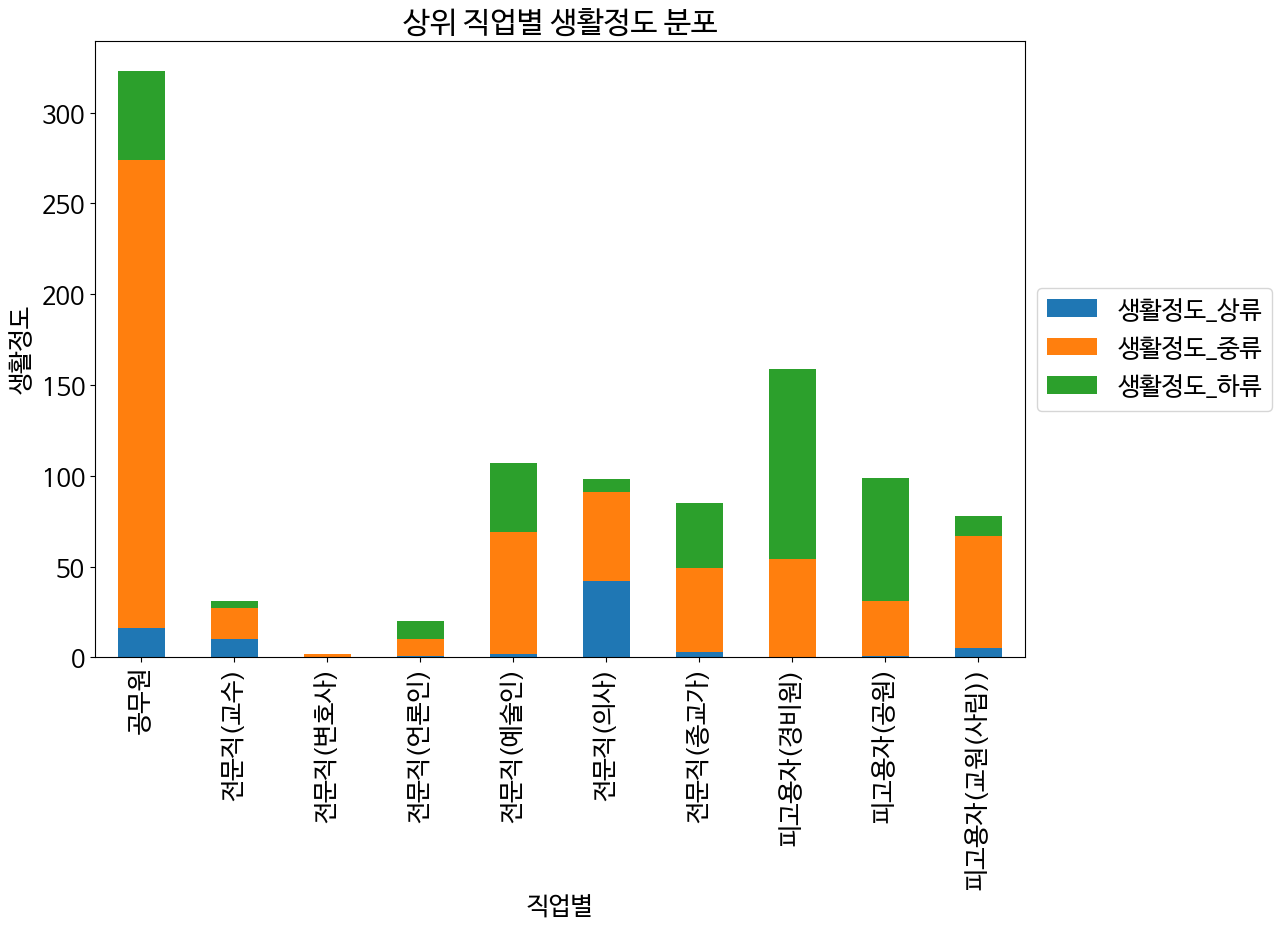

In [17]:
# 필터링한 데이터를 피벗하여 그래프 생성
pivot_df = top_10_jobs_data.pivot_table(index='직업별', values=['생활정도_하류', '생활정도_중류', '생활정도_상류'])

# 그래프 생성
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('상위 직업별 생활정도 분포')
plt.xlabel('직업별')
plt.ylabel('생활정도')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [40]:
crime_categories = ['강간', '유사강간', '강제추행', '성풍속범죄']
columns_of_interest = [
    '자영업(농.임.수산업)', '자영업(제조업)', '자영업(건설업)', '자영업(도.소매업)', '자영업(무역업)', '자영업(요식업)', '자영업(숙박업)',
    '자영업(유흥업)', '자영업(금융업)', '자영업(부동산업)', '자영업(의료보건업)', '자영업(차량정비업)', '자영업(노점)', '자영업(행상)', '자영업(기타사업)',
    '피고용자(교원(사립))', '피고용자(사무원)', '피고용자(기술자)', '피고용자(점원)', '피고용자(공원)', '피고용자(운전사)', '피고용자(경비원)', '피고용자(외판원)',
    '피고용자(국공영기업체직원)', '피고용자(일반회사원)', '피고용자(금융기관직원)', '피고용자(유흥업종사자)', '피고용자(요식업종사자)', '피고용자(일용노동자)',
    '피고용자(기타피고용자)', '전문직(의사)', '전문직(변호사)', '전문직(교수)', '전문직(종교가)', '전문직(언론인)', '전문직(예술인)', '전문직(기타전문직)',
    '공무원', '기타(학생)', '기타(주부)', '기타(전경.의경)', '기타(공익요원)', '무직자', '미상'
]

# crime_categories에 해당하는 범죄 카테고리의 값만을 더합니다.
sum_of_crimes = df.loc[crime_categories, columns_of_interest].sum()

diff = set(df3['직업별']).symmetric_difference(set(columns_of_interest))
print(diff)

print(sum_of_crimes)




set()
자영업(농.임.수산업)       351
자영업(제조업)            79
자영업(건설업)           290
자영업(도.소매업)          29
자영업(무역업)            15
자영업(요식업)           187
자영업(숙박업)            51
자영업(유흥업)            81
자영업(금융업)            19
자영업(부동산업)          104
자영업(의료보건업)           8
자영업(차량정비업)          24
자영업(노점)             15
자영업(행상)              0
자영업(기타사업)         2803
피고용자(교원(사립))        35
피고용자(사무원)           52
피고용자(기술자)          236
피고용자(점원)            50
피고용자(공원)            86
피고용자(운전사)          661
피고용자(경비원)          119
피고용자(외판원)          120
피고용자(국공영기업체직원)      12
피고용자(일반회사원)       5793
피고용자(금융기관직원)        38
피고용자(유흥업종사자)        59
피고용자(요식업종사자)       257
피고용자(일용노동자)        740
피고용자(기타피고용자)      1880
전문직(의사)            157
전문직(변호사)            13
전문직(교수)             18
전문직(종교가)           121
전문직(언론인)            21
전문직(예술인)            82
전문직(기타전문직)         781
공무원                430
기타(학생)            5022
기타(주부)              47
기타(전경.의경)           16
기타(공익요원)            51
무직자               7728
미상   

In [41]:
#군인 행 삭제
df3 = df3[~df3['직업별'].str.contains('군인')]


# df3의 인덱스를 'crime_categories'로 설정하여 일치시킴

df3 = df3.set_index(sum_of_crimes.index)

if df3.index.equals(sum_of_crimes.index):
    df3['죄종별_직업별_범죄합'] = sum_of_crimes
    print(df3['죄종별_직업별_범죄합'])
else:
    print("데이터프레임의 인덱스와 sum_of_crimes가 일치하지 않습니다.")


# 필요한 컬럼만 남기기
df3 = df3[['직업별', '생활정도_하류', '생활정도_중류', '생활정도_상류','죄종별_직업별_범죄합']]
df3.head()


자영업(농.임.수산업)       351
자영업(제조업)            79
자영업(건설업)           290
자영업(도.소매업)          29
자영업(무역업)            15
자영업(요식업)           187
자영업(숙박업)            51
자영업(유흥업)            81
자영업(금융업)            19
자영업(부동산업)          104
자영업(의료보건업)           8
자영업(차량정비업)          24
자영업(노점)             15
자영업(행상)              0
자영업(기타사업)         2803
피고용자(교원(사립))        35
피고용자(사무원)           52
피고용자(기술자)          236
피고용자(점원)            50
피고용자(공원)            86
피고용자(운전사)          661
피고용자(경비원)          119
피고용자(외판원)          120
피고용자(국공영기업체직원)      12
피고용자(일반회사원)       5793
피고용자(금융기관직원)        38
피고용자(유흥업종사자)        59
피고용자(요식업종사자)       257
피고용자(일용노동자)        740
피고용자(기타피고용자)      1880
전문직(의사)            157
전문직(변호사)            13
전문직(교수)             18
전문직(종교가)           121
전문직(언론인)            21
전문직(예술인)            82
전문직(기타전문직)         781
공무원                430
기타(학생)            5022
기타(주부)              47
기타(전경.의경)           16
기타(공익요원)            51
무직자               7728
미상         

,직업별,생활정도_하류,생활정도_중류,생활정도_상류,죄종별_직업별_범죄합
자영업(농.임.수산업),자영업(농.임.수산업),177,143,5,351
자영업(제조업),자영업(제조업),47,41,10,79
자영업(건설업),자영업(건설업),112,124,11,290
자영업(도.소매업),자영업(도.소매업),22,28,3,29
자영업(무역업),자영업(무역업),8,16,1,15


In [53]:
from sklearn.linear_model import LinearRegression

# NaN 값이 있는 행 제거
df3.dropna(subset=['죄종별_직업별_범죄합', '생활정도_하류', '생활정도_중류', '생활정도_상류'], inplace=True)

# 데이터 준비
X = df3[['죄종별_직업별_범죄합']]
y = df3[['생활정도_하류', '생활정도_중류', '생활정도_상류']]
print(X)

                죄종별_직업별_범죄합
자영업(농.임.수산업)            351
자영업(제조업)                 79
자영업(건설업)                290
자영업(도.소매업)               29
자영업(무역업)                 15
자영업(요식업)                187
자영업(숙박업)                 51
자영업(유흥업)                 81
자영업(금융업)                 19
자영업(부동산업)               104
자영업(의료보건업)                8
자영업(차량정비업)               24
자영업(노점)                  15
자영업(행상)                   0
자영업(기타사업)              2803
피고용자(교원(사립))             35
피고용자(사무원)                52
피고용자(기술자)               236
피고용자(점원)                 50
피고용자(공원)                 86
피고용자(운전사)               661
피고용자(경비원)               119
피고용자(외판원)               120
피고용자(국공영기업체직원)           12
피고용자(일반회사원)            5793
피고용자(금융기관직원)             38
피고용자(유흥업종사자)             59
피고용자(요식업종사자)            257
피고용자(일용노동자)             740
피고용자(기타피고용자)           1880
전문직(의사)                 157
전문직(변호사)                 13
전문직(교수)                  18
전문직(종교가)                121
전문직(언론인)            

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# NaN 값이 있는 행 제거
df3.dropna(subset=['죄종별_직업별_범죄합', '생활정도_하류', '생활정도_중류', '생활정도_상류'], inplace=True)

# 데이터 준비
X = df3[['죄종별_직업별_범죄합']]

# 하류 데이터 준비
y_lower = df3[['생활정도_하류']]
X_train_lower, X_test_lower, y_train_lower, y_test_lower = train_test_split(X, y_lower, test_size=0.3, random_state=42)

# 중류 데이터 준비
y_middle = df3[['생활정도_중류']]
X_train_middle, X_test_middle, y_train_middle, y_test_middle = train_test_split(X, y_middle, test_size=0.3, random_state=42)

# 상류 데이터 준비
y_upper = df3[['생활정도_상류']]
X_train_upper, X_test_upper, y_train_upper, y_test_upper = train_test_split(X, y_upper, test_size=0.3, random_state=42)

# 각각의 회귀 모델 초기화
model_lower = LinearRegression()
model_middle = LinearRegression()
model_upper = LinearRegression()

# 하류 회귀 모델 훈련
model_lower.fit(X_train_lower, y_train_lower)

# 중류 회귀 모델 훈련
model_middle.fit(X_train_middle, y_train_middle)

# 상류 회귀 모델 훈련
model_upper.fit(X_train_upper, y_train_upper)

# 각 모델의 성능 측정
r_squared_lower = model_lower.score(X_test_lower, y_test_lower)
r_squared_middle = model_middle.score(X_test_middle, y_test_middle)
r_squared_upper = model_upper.score(X_test_upper, y_test_upper)

# 결과 출력
print("하류의 정확도 (R-squared):", r_squared_lower)
print("중류의 정확도 (R-squared):", r_squared_middle)
print("상류의 정확도 (R-squared):", r_squared_upper)


하류의 정확도 (R-squared): 0.9710158070094292
중류의 정확도 (R-squared): 0.8428757765100872
상류의 정확도 (R-squared): 0.905096566720173


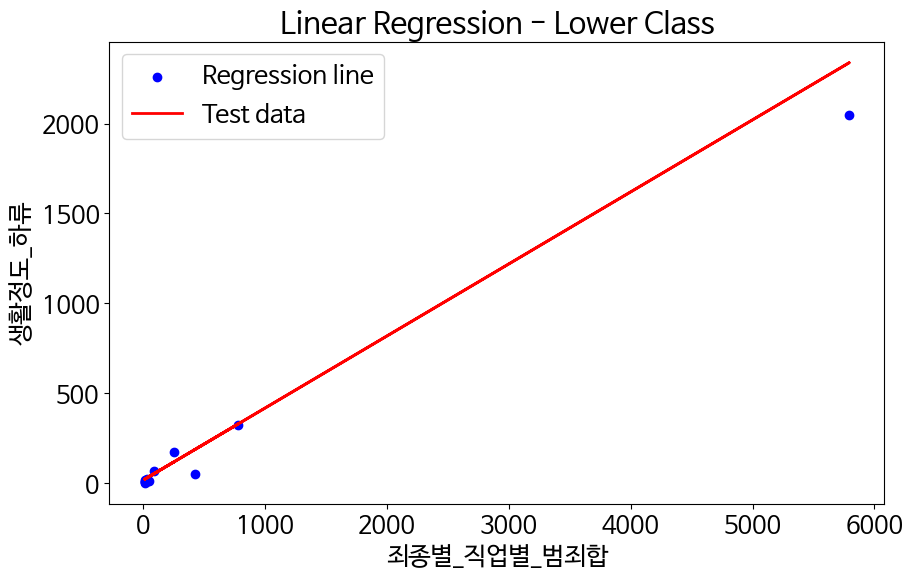

기울기 (Coefficient): [[0.40121807]]
절편 (Intercept): [14.18627527]
정확도 (R-squared): 0.9710158070094292


In [67]:
plt.figure(figsize=(10, 6))

# 실제 데이터
plt.scatter(X_test_all, y_test_all['생활정도_하류'], color='blue')

# 회귀 예측 결과
plt.plot(X_test_all, predictions_all[:, 0], color='red', linewidth=2)

plt.title('Linear Regression - Lower Class')
plt.xlabel('죄종별_직업별_범죄합')
plt.ylabel('생활정도_하류')
plt.legend(['Regression line', 'Test data'])
plt.show()

print("기울기 (Coefficient):", model_lower.coef_)
print("절편 (Intercept):", model_lower.intercept_)
print("정확도 (R-squared):", r_squared_lower)


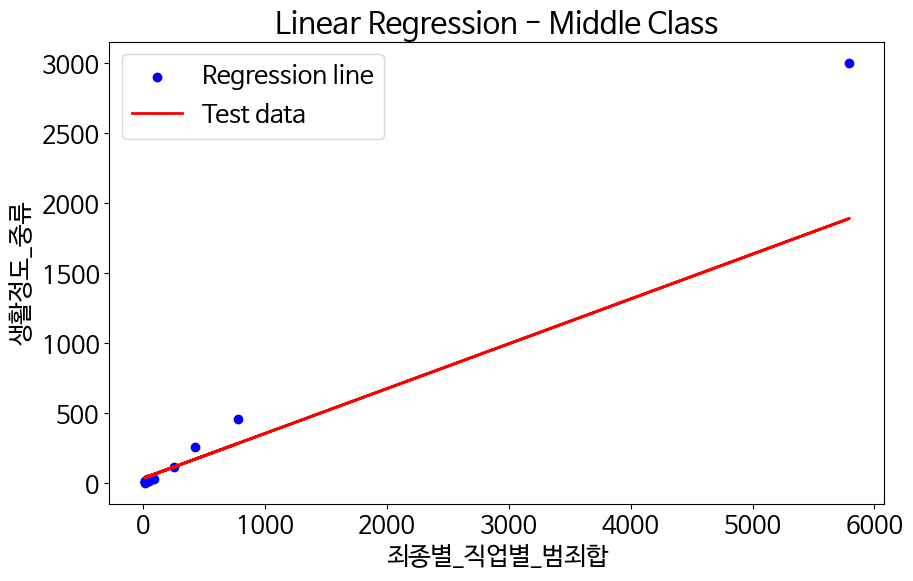

기울기 (Coefficient): [[0.32042959]]
절편 (Intercept): [33.41282841]
정확도 (R-squared): 0.8428757765100872


In [68]:
# 중류 예측 수행
predictions_middle = model_middle.predict(X_test_middle)

plt.figure(figsize=(10, 6))

# 실제 데이터
plt.scatter(X_test_middle, y_test_middle, color='blue')

# 회귀 예측 결과
plt.plot(X_test_middle, predictions_middle, color='red', linewidth=2)

plt.title('Linear Regression - Middle Class')
plt.xlabel('죄종별_직업별_범죄합')
plt.ylabel('생활정도_중류')
plt.legend(['Regression line', 'Test data'])
plt.show()

print("기울기 (Coefficient):", model_middle.coef_)
print("절편 (Intercept):", model_middle.intercept_)
print("정확도 (R-squared):", r_squared_middle)


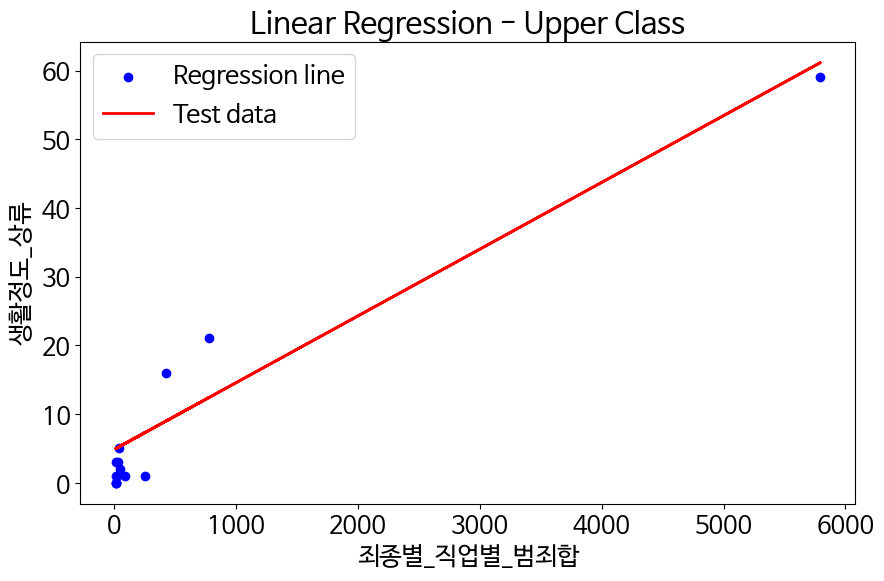

기울기 (Coefficient): [[0.00971902]]
절편 (Intercept): [4.83130377]
정확도 (R-squared): 0.905096566720173


In [69]:
# 상류 예측 수행
predictions_upper = model_upper.predict(X_test_upper)

plt.figure(figsize=(10, 6))

# 실제 데이터
plt.scatter(X_test_upper, y_test_upper, color='blue')

# 회귀 예측 결과
plt.plot(X_test_upper, predictions_upper, color='red', linewidth=2)

plt.title('Linear Regression - Upper Class')
plt.xlabel('죄종별_직업별_범죄합')
plt.ylabel('생활정도_상류')
plt.legend(['Regression line', 'Test data'])
plt.show()

print("기울기 (Coefficient):", model_upper.coef_)
print("절편 (Intercept):", model_upper.intercept_)
print("정확도 (R-squared):", r_squared_upper)
